In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tqdm import tqdm

In [2]:
df = pd.read_csv('train.csv', index_col='Id')

In [3]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [6]:
df2 = df.copy(deep=True)

In [7]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [8]:
df.MasVnrArea[df.MasVnrArea.isna()]

Id
235    NaN
530    NaN
651    NaN
937    NaN
974    NaN
978    NaN
1244   NaN
1279   NaN
Name: MasVnrArea, dtype: float64

In [9]:
df2.MasVnrArea = df2.MasVnrArea.fillna(0)

In [10]:
df.MasVnrType.describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [11]:
df.dtypes[1]

dtype('O')

In [12]:
col_list = list(df.columns [df.dtypes == 'object'])
col_uniq = list()

In [13]:
for col in col_list:
    print(df[col].unique())
    col_uniq.append(df[col].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng

In [14]:
dict_col = []
def change(column):
    column.remove(nan)
    column.insert(0,nan)
for col in col_uniq:
    l =  [x for x in range(len(col))]
    dict_col.append(dict(zip(col,l)))
dict_col

[{'RL': 0, 'RM': 1, 'C (all)': 2, 'FV': 3, 'RH': 4},
 {'Pave': 0, 'Grvl': 1},
 {nan: 0, 'Grvl': 1, 'Pave': 2},
 {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3},
 {'Lvl': 0, 'Bnk': 1, 'Low': 2, 'HLS': 3},
 {'AllPub': 0, 'NoSeWa': 1},
 {'Inside': 0, 'FR2': 1, 'Corner': 2, 'CulDSac': 3, 'FR3': 4},
 {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 {'CollgCr': 0,
  'Veenker': 1,
  'Crawfor': 2,
  'NoRidge': 3,
  'Mitchel': 4,
  'Somerst': 5,
  'NWAmes': 6,
  'OldTown': 7,
  'BrkSide': 8,
  'Sawyer': 9,
  'NridgHt': 10,
  'NAmes': 11,
  'SawyerW': 12,
  'IDOTRR': 13,
  'MeadowV': 14,
  'Edwards': 15,
  'Timber': 16,
  'Gilbert': 17,
  'StoneBr': 18,
  'ClearCr': 19,
  'NPkVill': 20,
  'Blmngtn': 21,
  'BrDale': 22,
  'SWISU': 23,
  'Blueste': 24},
 {'Norm': 0,
  'Feedr': 1,
  'PosN': 2,
  'Artery': 3,
  'RRAe': 4,
  'RRNn': 5,
  'RRAn': 6,
  'PosA': 7,
  'RRNe': 8},
 {'Norm': 0,
  'Artery': 1,
  'RRNn': 2,
  'Feedr': 3,
  'PosN': 4,
  'PosA': 5,
  'RRAn': 6,
  'RRAe': 7},
 {'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Tw

In [15]:
# df2
for dict_, name in zip(dict_col,col_list):
    print(name)
    df2[name] = df2[name].map(dict_)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [16]:
df2.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [17]:
years = {2008:0, 2007:1, 2006:2, 2009:3, 2010:4}

In [18]:
df2.YrSold = df2.YrSold.map(years) 

In [19]:
df2.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [34]:
df2.Alley = df.Alley

In [35]:
ternary = {'Grvl':1, 'Pave':2}
df2.Alley = df2.Alley.map(ternary)
df2.Alley = df2.Alley.fillna(0)


In [36]:
df2.Alley.unique()

array([0., 1., 2.])

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          0 non-null      float64
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [23]:
df2.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [24]:
df2.GarageYrBlt = df2.GarageYrBlt.fillna(1980.)

In [25]:
df2.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [26]:
df2.LotFrontage.median()

69.0

In [27]:
df2.LotFrontage = df2.LotFrontage.fillna(69)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          0 non-null      float64
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [39]:
corr = df2.corr().style.background_gradient(cmap='coolwarm', axis=None)
corr

In [30]:
type(corr)

pandas.io.formats.style.Styler

In [31]:
corr.to_excel('C:/Users/rshir/house-prices/corr.xlsx', engine='openpyxl')

In [33]:
len(df.columns)

80

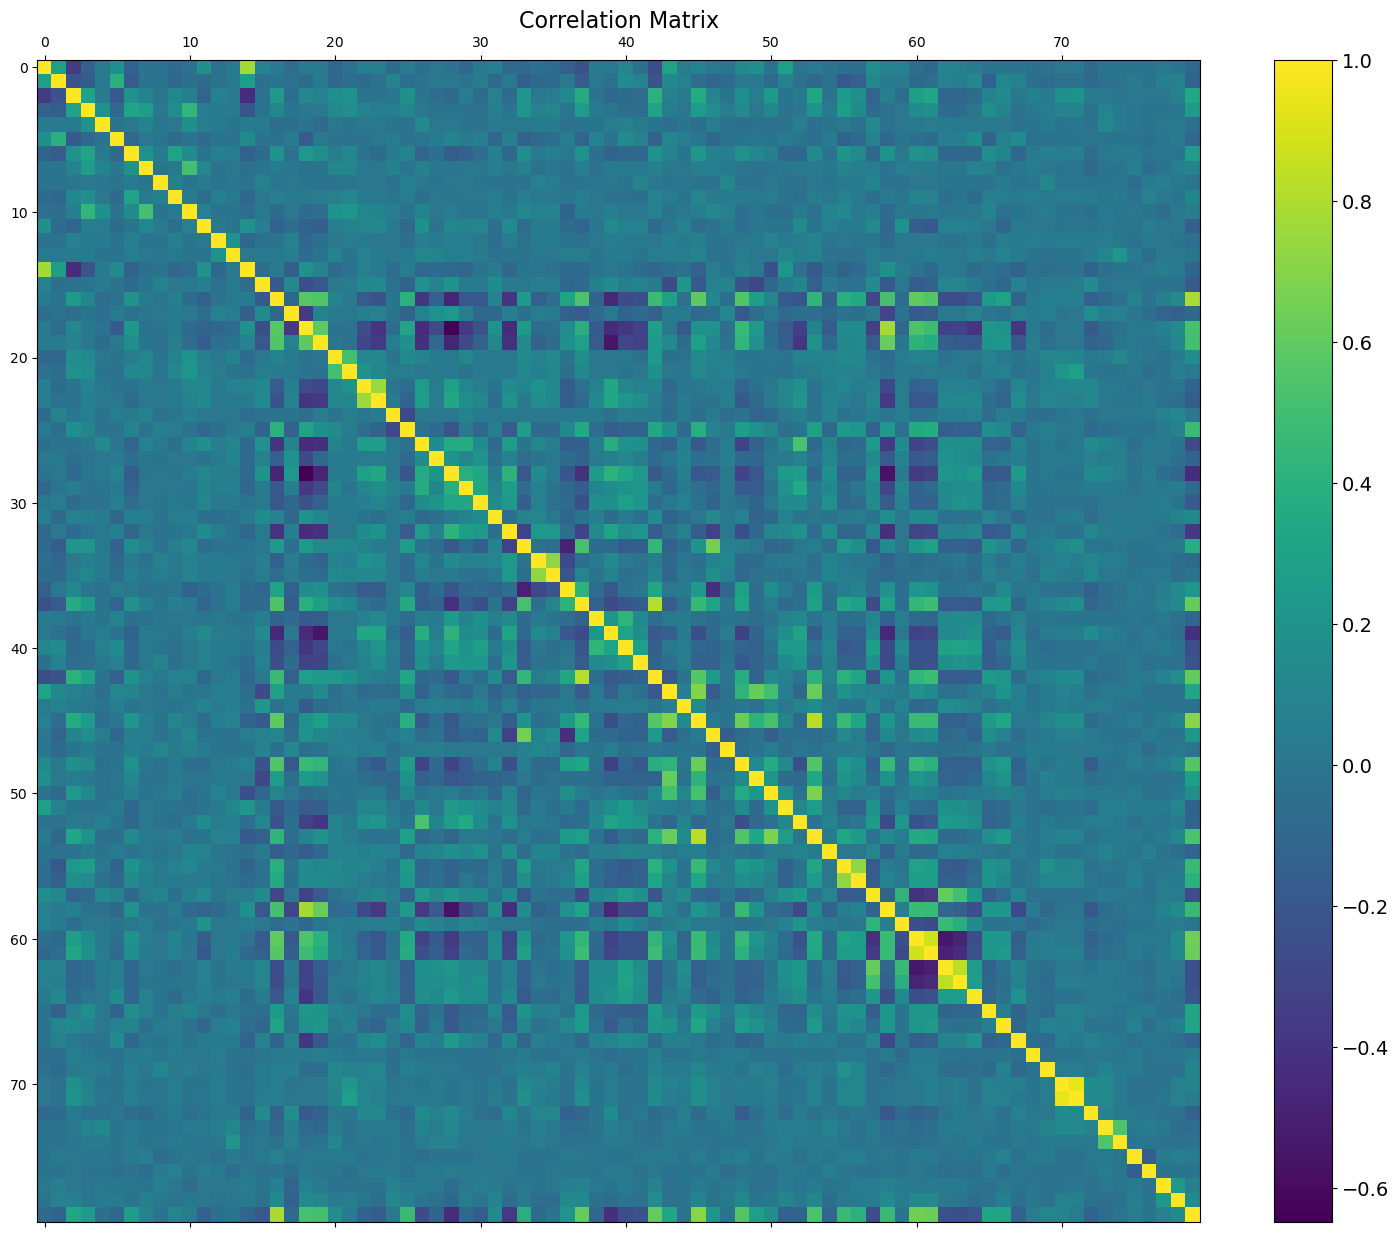

In [43]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
# plt.xticks(range(df2.select_dtypes(['number']).shape[1]), df2.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df2.select_dtypes(['number']).shape[1]), df2.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [115]:
df3 = df2.copy(deep=True)

In [116]:
scaler = preprocessing.StandardScaler().fit(df3)
df3 = scaler.transform(df3)

In [117]:
df3 = pd.DataFrame(data=df3, columns=df2.columns)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('SalePrice', axis=1), df3.SalePrice, test_size=0.33, random_state=42)

In [87]:
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_scaled = scaler.transform(X_train)

array([[ 0.64818752, -0.4266962 ,  0.43265733, ...,  1.65411761,
        -0.29391166,  0.70142259],
       [-0.86866433, -0.4266962 , -0.00191068, ..., -0.63403942,
         1.09471443,  1.79550758],
       [-0.86866433, -0.4266962 ,  0.12845972, ...,  0.12867959,
        -0.29391166, -0.39266241],
       ...,
       [-0.86866433, -0.4266962 , -0.43647868, ...,  0.12867959,
        -0.29391166, -0.39266241],
       [-0.16857886, -0.4266962 , -0.65376268, ..., -0.63403942,
        -0.29391166, -0.39266241],
       [ 1.4649539 , -0.4266962 , -0.74067628, ...,  0.8913986 ,
        -0.29391166, -0.39266241]])

In [154]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, PoissonRegressor, QuantileRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [139]:
model_linear = LinearRegression()
model_Ridge = Ridge()
model_Lasso = Lasso()
model_PoissonRegressor = PoissonRegressor()
model_QuantileRegressor = QuantileRegressor(solver='highs')

In [140]:
model_linear.fit(X_train,y_train)

LinearRegression()

In [141]:
print(model_linear.score(X_train, y_train))
print(model_linear.score(X_test, y_test))

0.861751359576314
0.8376122837408745


In [142]:
model_Ridge.fit(X_train,y_train)

Ridge()

In [143]:
print(model_Ridge.score(X_train, y_train))
print(model_Ridge.score(X_test, y_test))

0.8617306155095095
0.8380176112793125


In [144]:
model_Lasso.fit(X_train,y_train)

Lasso()

In [145]:
print(model_Lasso.score(X_train, y_train))
print(model_Lasso.score(X_test, y_test))

0.0
-1.9765701703367e-05


In [127]:
model_PoissonRegressor.fit(X_train,y_train) #не смог разобраться

ValueError: Some value(s) of y are out of the valid range for family PoissonDistribution

In [81]:
print(model_PoissonRegressor.score(X_train, y_train))
print(model_PoissonRegressor.score(X_test, y_test))

0.0
-2.3537225120717764e-05


In [137]:
tqdm(model_QuantileRegressor.fit(X_train,y_train)) # не смог разобраться


0it [00:00, ?it/s]

In [138]:
print(model_QuantileRegressor.score(X_train, y_train))
print(model_QuantileRegressor.score(X_test, y_test))

-0.044476923186850925
-0.033472913304610774


In [162]:
clf = tree.DecisionTreeRegressor(max_depth=10, min_samples_leaf=30)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7954597642756109
0.7358122319924126


In [166]:
clforest = RandomForestRegressor(max_depth=100)
clforest.fit(X_train, y_train)
print(clforest.score(X_train, y_train))
print(clforest.score(X_test, y_test))

0.9758601565302211
0.8638129505400396
